In [158]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

sns.set(rc={"figure.figsize":(12, 12)})


In [159]:
# Load the dataset
df = pd.read_csv('day.csv')


### The dataset contains daily records of bike rentals and associated features like weather, season, etc.

In [160]:
# Display basic information about the dataset
print("Dataset Info:\n")
df.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Describe the data for its properties

In [161]:
## Describe the data for its properties
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [162]:
print("\nFirst 5 Rows:")
df.head()


First 5 Rows:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600



### Data quality checks

In [163]:

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n")
print(missing_values)


Missing Values:

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### Note: No Missing values are seen


#### This step replaces numerical categories with descriptive names for clarity

In [164]:
# Map categorical variables to meaningful labels
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
weather_mapping = {1: "Clear", 2: "Mist", 3: "Light Rain/Snow", 4: "Heavy Rain/Snow"}

In [165]:
df['season'] = df['season'].map(season_mapping)
df['weathersit'] = df['weathersit'].map(weather_mapping)

In [166]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Drop unnecessary columns

#### These columns are either identifiers or components of the target variable (`cnt`) and are not needed for modeling

In [167]:
# Drop unnecessary columns
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']
df = df.drop(columns=columns_to_drop, axis=1)

In [168]:

print(" After dropping unnecessary columns the data looks as below \n")

print(df.head())

 After dropping unnecessary columns the data looks as below 

   season  yr  mnth  holiday  weekday  workingday weathersit       temp  \
0  Spring   0     1        0        6           0       Mist  14.110847   
1  Spring   0     1        0        0           0       Mist  14.902598   
2  Spring   0     1        0        1           1      Clear   8.050924   
3  Spring   0     1        0        2           1      Clear   8.200000   
4  Spring   0     1        0        3           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600  



### One-Hot Encoding for categorical variables

#### Convert categorical variables like `season` and `weathersit` into binary columns for machine learning models

In [169]:
# One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=['season', 'weathersit'], drop_first=True)

In [170]:

print(" After converting categorical variables like season and weathersit into binary columns  \n")
print(df.head())

 After converting categorical variables like season and weathersit into binary columns  

   yr  mnth  holiday  weekday  workingday       temp     atemp      hum  \
0   0     1        0        6           0  14.110847  18.18125  80.5833   
1   0     1        0        0           0  14.902598  17.68695  69.6087   
2   0     1        0        1           1   8.050924   9.47025  43.7273   
3   0     1        0        2           1   8.200000  10.60610  59.0435   
4   0     1        0        3           1   9.305237  11.46350  43.6957   

   windspeed   cnt  season_Spring  season_Summer  season_Winter  \
0  10.749882   985              1              0              0   
1  16.652113   801              1              0              0   
2  16.636703  1349              1              0              0   
3  10.739832  1562              1              0              0   
4  12.522300  1600              1              0              0   

   weathersit_Light Rain/Snow  weathersit_Mist  
0      

### Feature engineering: Checking multicollinearity

### Calculate Variance Inflation Factor (VIF) to identify highly correlated features


In [171]:

# Calculate Variance Inflation Factor (VIF) for all features
vif_data = pd.DataFrame()
vif_data["Feature"] = df.drop('cnt', axis=1).columns
vif_data["VIF"] = [variance_inflation_factor(df.drop('cnt', axis=1).values, i) for i in range(len(df.drop('cnt', axis=1).columns))]
print("\nVariance Inflation Factor (VIF):\n")
print(vif_data)


Variance Inflation Factor (VIF):

                       Feature         VIF
0                           yr    2.038819
1                         mnth   13.937693
2                      holiday    1.115239
3                      weekday    3.196093
4                   workingday    3.344655
5                         temp  588.649833
6                        atemp  619.713724
7                          hum   31.063370
8                    windspeed    7.077890
9                season_Spring    4.399797
10               season_Summer    2.680504
11               season_Winter    4.288072
12  weathersit_Light Rain/Snow    1.297836
13             weathersit_Mist    2.314129


### Define features (X) and target variable (y)
#### `X` contains all independent variables, while `y` is the target variable (`cnt`)

In [172]:
#define X and y
X = df.drop('cnt', axis=1)
y = df['cnt']

### Split the data into training and testing sets
#### This ensures the model is evaluated on unseen data for better generalization

In [173]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train multiple models and evaluate performance on the above Train and Test data 

## 1. Linear Regression

### Linear regression provides a baseline model for comparison

In [174]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

### Predictions of Linear Regression

In [175]:
# Predictions
lr_train_pred = lr_model.predict(X_train)
lr_test_pred = lr_model.predict(X_test)

# Evaluation metrics
lr_r2_train = r2_score(y_train, lr_train_pred)
lr_r2_test = r2_score(y_test, lr_test_pred)
lr_rmse_train = mean_squared_error(y_train, lr_train_pred, squared=False)
lr_rmse_test = mean_squared_error(y_test, lr_test_pred, squared=False)

print("\nLinear Regression Evaluation:\n")
print(f"R-squared (Training): {lr_r2_train:.4f}")
print(f"RMSE (Training): {lr_rmse_train:.2f}")
print(f"R-squared (Testing): {lr_r2_test:.4f}")
print(f"RMSE (Testing): {lr_rmse_test:.2f}")


Linear Regression Evaluation:

R-squared (Training): 0.8249
RMSE (Training): 810.35
R-squared (Testing): 0.8291
RMSE (Testing): 796.24


## 2. Ridge Regression

### Ridge regression addresses multicollinearity by penalizing large coefficients

In [176]:
# 2. Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

### Predictions of Ridge Regression

In [177]:
# Predictions
ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)

### Evaluation metrics for Ridge Regression

In [178]:
# Evaluation metrics
ridge_r2_train = r2_score(y_train, ridge_train_pred)
ridge_r2_test = r2_score(y_test, ridge_test_pred)
ridge_rmse_train = mean_squared_error(y_train, ridge_train_pred, squared=False)
ridge_rmse_test = mean_squared_error(y_test, ridge_test_pred, squared=False)

print("\nRidge Regression Evaluation:\n")
print(f"R-squared (Training): {ridge_r2_train:.4f}")
print(f"RMSE (Training): {ridge_rmse_train:.2f}")
print(f"R-squared (Testing): {ridge_r2_test:.4f}")
print(f"RMSE (Testing): {ridge_rmse_test:.2f}")


Ridge Regression Evaluation:

R-squared (Training): 0.8247
RMSE (Training): 810.81
R-squared (Testing): 0.8286
RMSE (Testing): 797.46


## 3. Lasso Regression

### Lasso regression performs feature selection by shrinking coefficients of less important variables to zero

In [179]:
# 3. Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

/Users/aparnanammi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.110e+08, tolerance: 1.916e+05
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

### Predictions of Lasso Regression

In [180]:
# Predictions
lasso_train_pred = lasso_model.predict(X_train)
lasso_test_pred = lasso_model.predict(X_test)


### Evaluation metrics for Lasso Regression

In [181]:
# Evaluation metrics
lasso_r2_train = r2_score(y_train, lasso_train_pred)
lasso_r2_test = r2_score(y_test, lasso_test_pred)
lasso_rmse_train = mean_squared_error(y_train, lasso_train_pred, squared=False)
lasso_rmse_test = mean_squared_error(y_test, lasso_test_pred, squared=False)

print("\nLasso Regression Evaluation:\n")
print(f"R-squared (Training): {lasso_r2_train:.4f}")
print(f"RMSE (Training): {lasso_rmse_train:.2f}")
print(f"R-squared (Testing): {lasso_r2_test:.4f}")
print(f"RMSE (Testing): {lasso_rmse_test:.2f}")


Lasso Regression Evaluation:

R-squared (Training): 0.8249
RMSE (Training): 810.35
R-squared (Testing): 0.8291
RMSE (Testing): 796.22


### Choose the best model based on R-squared and RMSE

In [182]:
# Choose the best model based on R-squared and RMSE
# Residual Analysis for the chosen model (e.g., Linear Regression)
chosen_model = lr_model
chosen_train_pred = lr_train_pred
chosen_test_pred = lr_test_pred


## Residuals

In [183]:

# Residuals represent the difference between actual and predicted values
chosen_residuals = y_train - chosen_train_pred

### Q-Q Plot

### If the points closely follow the diagonal line, the residuals are roughly normally distributed. Systematic deviations (e.g., S-curves, heavy tails) suggest non-normality, possibly indicating outliers or missing transformations.

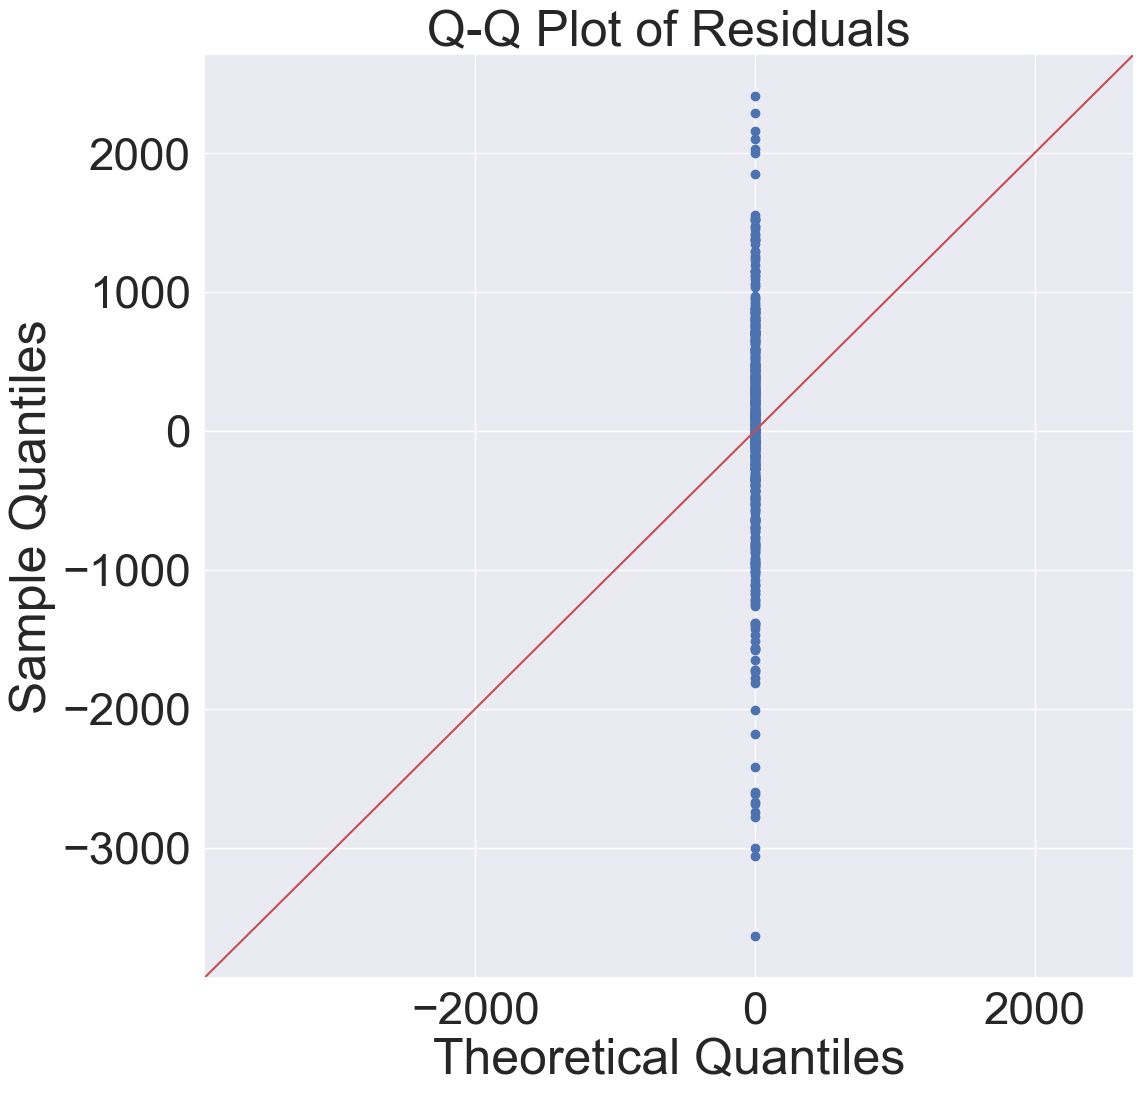

In [195]:


# Plot the Q-Q plot
sm.qqplot(chosen_residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

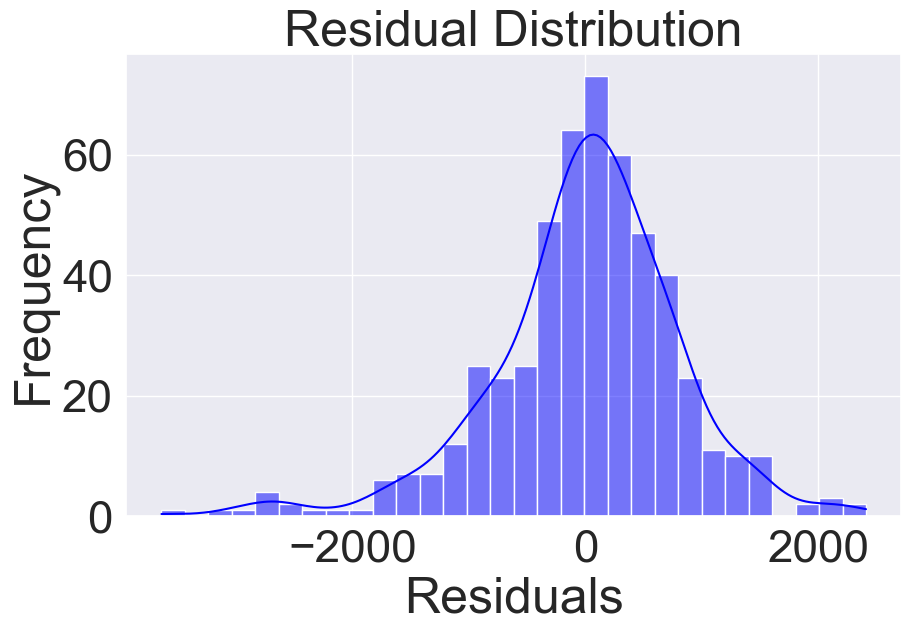

In [196]:
# Residual Distribution
plt.figure(figsize=(10, 6))
sns.histplot(chosen_residuals, kde=True, color='blue')
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

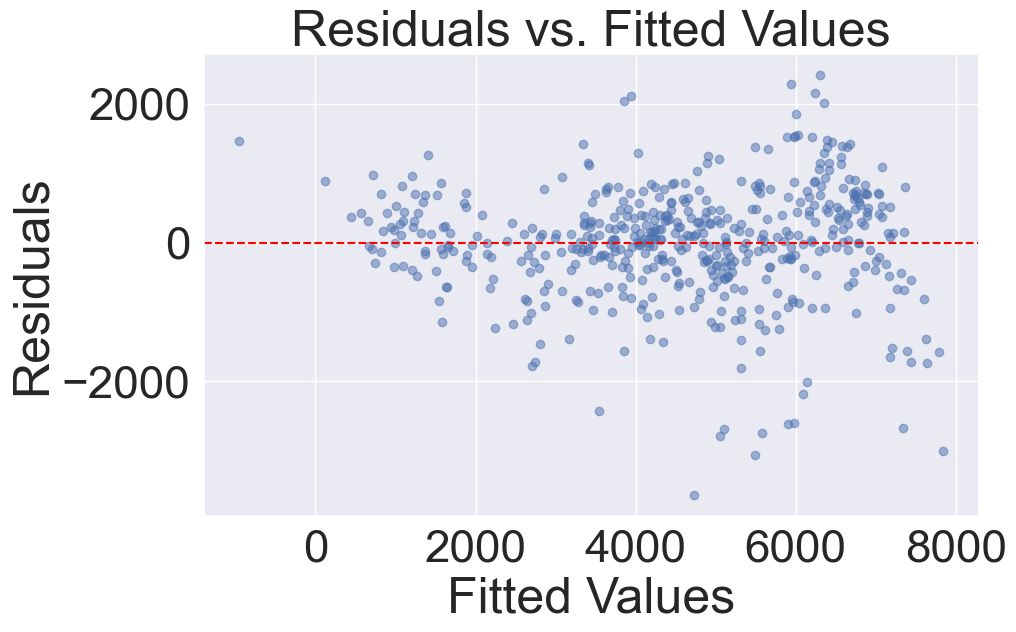

In [197]:
# Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
plt.scatter(chosen_train_pred, chosen_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()



### Displaying the influence of each feature on the target variable

In [198]:
# Coefficient interpretation for the chosen model
chosen_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': chosen_model.coef_
}).sort_values(by='Coefficient', ascending=False)
print("\nChosen Model Coefficients:")
print(chosen_coefficients)



Chosen Model Coefficients:
                       Feature  Coefficient
0                           yr  1975.903385
11               season_Winter   801.200532
10               season_Summer   183.215687
4                   workingday   140.502921
5                         temp    66.926271
3                      weekday    60.093255
6                        atemp    51.398500
7                          hum   -10.775988
1                         mnth   -34.478646
8                    windspeed   -35.938486
13             weathersit_Mist  -466.912027
2                      holiday  -473.741593
9                season_Spring -1096.654843
12  weathersit_Light Rain/Snow -1873.112699


## Pair Plot

In [199]:
sns.set(font_scale=3) 
# Selecting numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Increase the figure size using the 'height' parameter in sns.pairplot
sns.pairplot(df, vars=numeric_cols, diag_kind='kde', corner=True, height=6)

plt.suptitle("Pair-Plot of Numerical Variables", y=1.02, fontsize=16)
plt.show()





#### Based on typical analyses of this dataset, temperature (temp) shows the highest correlation with the target variable (cnt) among the numeric variables. Generally, bike rentals increase with favorable (warmer) weather, making temperature a strong predictor of bike demand.

In [193]:
# Suppose df is your preprocessed DataFrame for the bike dataset
# focusing on numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Pearson correlation matrix
corr_matrix = df[numeric_cols].corr(method='pearson')

print("Pearson Correlation Matrix:")
print(corr_matrix)

# If you want a specific correlation, say between 'cnt' and 'temp':
r_cnt_temp = corr_matrix.loc['cnt', 'temp']
print(f"\nPearson’s r for cnt and temp: {r_cnt_temp:.4f}")

Pearson Correlation Matrix:
                                      yr          mnth   holiday   weekday  \
yr                          1.000000e+00 -5.162656e-16  0.008195 -0.005466   
mnth                       -5.162656e-16  1.000000e+00  0.018905  0.009523   
holiday                     8.195345e-03  1.890483e-02  1.000000 -0.101962   
weekday                    -5.466369e-03  9.522969e-03 -0.101962  1.000000   
workingday                 -2.945396e-03 -4.687953e-03 -0.252948  0.035800   
temp                        4.878919e-02  2.190833e-01 -0.028764 -0.000168   
atemp                       4.721519e-02  2.264302e-01 -0.032703 -0.007539   
hum                        -1.125471e-01  2.249368e-01 -0.015662 -0.052290   
windspeed                  -1.162435e-02 -2.080131e-01  0.006257  0.014283   
cnt                         5.697285e-01  2.781909e-01 -0.068764  0.067534   
season_Spring               3.225068e-16 -5.684565e-01  0.034642  0.000782   
season_Summer              -1.751358